In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd /content/
#%cp -r ./Naver /content/drive/My\ Drive/

# **카테고리1 - 정치/경제/사회**

In [155]:
import re
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup
#url = "https://news.naver.com/main/ranking/office.nhn?officeId=055&date=20210225"
url = "https://entertain.naver.com/ranking"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers)   #200 client-server 통신의 200번 sign 그거 알지???
soup = BeautifulSoup(resp.text, "html.parser")
print(soup)
type(soup)
#어떻게 나오냐면, 지금 url에서 맨 위 그 잡다한 배너들부터 해서 싹다 뽑아져 나오는 중 meta content
#로고도 뽑아져 나옴 title로고랑 meta title 로고
#광고까지 + <li><span class="snb_bdr"></span><a class="nclicks(STA.weather)" href="https://weather.naver.com">< 여기까지가 지금 상위 배너
# 부제로 뉴스홈~랭킹뉴스까지 버튼 보이고 그다음에 뉴스검색란 보인 다음에 그 밑에 헤드라인 뉴스까지 보이지?
#그 옆에는 팩트체크 언론사 구독 언론사 뉴스 라이브러리
#그리고 랭킹뉴스에 들어와서 많이본뉴스 댓글 많은 뉴스 ㅇㅇㅇㅇ
#그리고 "https://mimgnews.pstatic.net/image/upload/office_logo/055/2020/10/07/logo_055_56_20201007141807.jpg" 여기에서 sbs 뉴스 로고가 보이네
#그리고 많이 본 뉴스와 댓글 많은 뉴스중에서 많이 본 뉴스를 보면 

<!DOCTYPE html>

<html lang="ko">
<head>
<title id="browse_title">랭킹 :: 네이버 TV연예</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script charset="utf-8" type="text/javascript">
var doc = document.documentElement;
doc.setAttribute('data-useragent', navigator.userAgent);
</script>
<link href="https://ssl.pstatic.net/static.news/image/news/2014/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<script src="https://static-entertain.pstatic.net/pc/resources/20210204_005409/js/infra/jindo/jindo.desktop.ns.min.js" type="text/javascript"></script>
<script src="https://static-entertain.pstatic.net/pc/resources/20210204_005409/js/infra/common/enter.define.js" type="text/javascript"></script>
<script src="https://static-entertain.pstatic.net/pc/resources/20210204_005409/js/infra/image/imageError.js" type="text/javascript"></script>
<script type="text/javascript">
document.domain = 'naver.com';
</script>
<script type="text/javascript">
(function 

bs4.BeautifulSoup

In [ ]:
press_ID = {"MBC" : "214" , "KBS" : "056" , "SBS" : "055" , "JTBC" : "437"}

In [158]:
import os
os.chdir(r"/content/drive/MyDrive/Naver/")

import re
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup

#press_ID = {"연합뉴스": "001", "조선일보":"023", "중앙일보":"025", "동아일보":"020", "MBC" : "214" , "KBS" : "056" , "SBS" : "055" , "JTBC" : "437"}
press_ID = {"연합뉴스": "001","JTBC" : "437", "KBS" : "056"}
def get_ranking_news(date):
  total_time = 0
  for press in press_ID:
    start = time.time()
    url = "https://news.naver.com/main/ranking/office.nhn?officeId=" + press_ID[press] + "&date=" + str(date)
    headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
    resp = requests.get(url , headers = headers)
    soup = BeautifulSoup(resp.text , "html.parser")
    ranking_box = soup.find_all(class_= "rankingnews_box_inner")
    I = []

    for ranking_type in range(2):   #그 안에 찾고싶은 class 갯수가 밑에처럼 두개가 있어서 2구나~!
      ranking = ranking_box[ranking_type].find_all(class_ = "list_ranking_num")
      url_list = ranking_box[ranking_type].find_all(class_ = "list_content")
      for rank in range(20):
        d = {}
        d['Date'] = int(date)
        d['Press'] = press
        d['Rank'] = ranking[rank].get_text()
        d['URL'] = url_list[rank].find('a')['href']
        d['Title'] = url_list[rank].find('a').get_text()
        if (ranking_type == 0):
          d['View'] = url_list[rank].find(class_="list_view").get_text()
        elif (ranking_type == 1):
          d['Comment'] = url_list[rank].find(class_="list_comment nclicks('RBP.dcmtnwscmt')").get_text()
        I.append(d)

    for news in I:
      resp = requests.get("https://news.naver.com" + news['URL'], headers = headers)
      soup = BeautifulSoup(resp.text,"html.parser")
      contents = soup.find(id="articleBodyContents").get_text()
      news['Content'] = re.sub('[\{\}\[\]\/?\(\);:|*~`!^\-_+<>▶▽♡◀ㅡ@\#$&\\\=\'\"ⓒ(\n)(\t)]', '', contents)
    
    df = pd.DataFrame(I)
    title = press + "/" + str(date) + "_" + press + "_ranking_news.csv"
    df.to_csv(title,sep=",", index = False, encoding = "utf-8-sig")
    end = time.time()
    total_time +=end -start
    print("Crawling "+ str(date) + " " + press + "news:", end -start)
  print("Total time:", total_time)
  print("Average time:", total_time/len(press_ID))
  print("=======================================")


In [159]:
#for i in range(24):
get_ranking_news(20210226)

Crawling 20210226 연합뉴스news: 20.171539783477783
Crawling 20210226 JTBCnews: 20.77287745475769
Crawling 20210226 KBSnews: 22.03466510772705
Total time: 62.979082345962524
Average time: 20.993027448654175


# **카테고리2 - 연애**

각 6가지 emotion들에 대해서 순위표 가져온 다음에 거기서 종합고려 ㄱㄱ

In [160]:
import re
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup

#비트코인 url = "https://gall.dcinside.com/board/lists/?id=bitcoins&page=1"
#url = "https://gall.dcinside.com/board/lists?id=neostock&page=1"
url = "https://entertain.naver.com/ranking#type=hit_total&date=2021-02-26"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers)
soup = BeautifulSoup(resp.text, "html.parser")
ranking_box = soup.find_all(class_= "rank_lst")
date = "20210226"

I=[]
url_rank = ranking_box[0].find_all(class_ = "blind")
a = ranking_box[0].find_all("a")
for rank in range(10):
  d = {}
  d['Date'] = int(date)
  d['Rank'] = url_rank[rank].get_text()
  d['URL'] = a[rank]['href']
  d['Title'] = a[rank].get_text()
  I.append(d)

In [161]:
# I는 위랑 이어진다!@!!!!
url = "https://entertain.naver.com/ranking/sympathy"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers)
soup = BeautifulSoup(resp.text, "html.parser")
ranking_box = soup.find_all(class_= "news_lst news_lst3 count_info")
url_rank = ranking_box[0].find_all(class_ = "blind")
url_list = ranking_box[0].find_all(class_ = "_inc_news_lst3_rank_reply")
#date = "20210226"

for rank in range(10):
  d = {}
  d['Date'] = int(date)
  if url_rank[rank].get_text() == "공감수":
    del url_rank[rank]
  d['Rank'] = url_rank[rank].get_text()
  d['URL'] = url_list[rank].find('a')['href']
  url_list2 = url_list[rank].find_all(class_ = "tit_area")
  d['Title'] = url_list2[0].find('a').get_text()
  I.append(d)
I

[{'Date': 20210226,
  'Rank': '1',
  'Title': '1\'진화♥︎\' 함소원, 이혼설 부인 "가정 지켜낼 것이다" [전문]',
  'URL': '/ranking/read?oid=109&aid=0004359465'},
 {'Date': 20210226,
  'Rank': '2',
  'Title': "2‘배용준♥’ 박수진, '애둘맘' 여배우의 흔한 민낯.. 무결점 비주얼에 감탄만",
  'URL': '/ranking/read?oid=109&aid=0004359579'},
 {'Date': 20210226,
  'Rank': '3',
  'Title': '3[단독] 함소원♥진화 측근 "진화, 결별 결정하고 출국 준비"→함소원 "침묵" [종합]',
  'URL': '/ranking/read?oid=076&aid=0003696777'},
 {'Date': 20210226,
  'Rank': '4',
  'Title': '4[단독]알고보니혼수상태 "양지은이 우리 노래로 \'미스트롯2\' 결승, 하늘의 뜻"(인터뷰)',
  'URL': '/ranking/read?oid=477&aid=0000287164'},
 {'Date': 20210226,
  'Rank': '5',
  'Title': "5[단독] '학폭 의혹' 조병규, KBS '컴백홈' 출연 보류…출연 반대 청원 등장[종합]",
  'URL': '/ranking/read?oid=076&aid=0003697474'},
 {'Date': 20210226,
  'Rank': '6',
  'Title': "6[단독]'학폭의혹' 조병규, '컴백홈' 출연 반대 청원 동의 3천명↑→결국 출연 보류..하차 수순(종합)",
  'URL': '/ranking/read?oid=112&aid=0003404232'},
 {'Date': 20210226,
  'Rank': '7',
  'Title': '7한민관, 증모술 후 확실히 어려보여.."이제 술 먹을 때 민증 검사 받겠네"',
  'URL': '/ran

In [162]:
# I는 위랑 이어진다!@!!!!
url = "https://entertain.naver.com/ranking/sympathy/cheer"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers)
soup = BeautifulSoup(resp.text, "html.parser")
ranking_box = soup.find_all(class_= "news_lst news_lst3 count_info")
url_rank = ranking_box[0].find_all(class_ = "blind")
url_list = ranking_box[0].find_all(class_ = "_inc_news_lst3_rank_reply")
#date = "20210226"

for rank in range(10):
  d = {}
  d['Date'] = int(date)
  if "수" in url_rank[rank].get_text():
    del url_rank[rank]
  d['Rank'] = url_rank[rank].get_text()
  d['URL'] = url_list[rank].find('a')['href']
  url_list2 = url_list[rank].find_all(class_ = "tit_area")
  d['Title'] = url_list2[0].find('a').get_text()
  I.append(d)
I

[{'Date': 20210226,
  'Rank': '1',
  'Title': '1\'진화♥︎\' 함소원, 이혼설 부인 "가정 지켜낼 것이다" [전문]',
  'URL': '/ranking/read?oid=109&aid=0004359465'},
 {'Date': 20210226,
  'Rank': '2',
  'Title': "2‘배용준♥’ 박수진, '애둘맘' 여배우의 흔한 민낯.. 무결점 비주얼에 감탄만",
  'URL': '/ranking/read?oid=109&aid=0004359579'},
 {'Date': 20210226,
  'Rank': '3',
  'Title': '3[단독] 함소원♥진화 측근 "진화, 결별 결정하고 출국 준비"→함소원 "침묵" [종합]',
  'URL': '/ranking/read?oid=076&aid=0003696777'},
 {'Date': 20210226,
  'Rank': '4',
  'Title': '4[단독]알고보니혼수상태 "양지은이 우리 노래로 \'미스트롯2\' 결승, 하늘의 뜻"(인터뷰)',
  'URL': '/ranking/read?oid=477&aid=0000287164'},
 {'Date': 20210226,
  'Rank': '5',
  'Title': "5[단독] '학폭 의혹' 조병규, KBS '컴백홈' 출연 보류…출연 반대 청원 등장[종합]",
  'URL': '/ranking/read?oid=076&aid=0003697474'},
 {'Date': 20210226,
  'Rank': '6',
  'Title': "6[단독]'학폭의혹' 조병규, '컴백홈' 출연 반대 청원 동의 3천명↑→결국 출연 보류..하차 수순(종합)",
  'URL': '/ranking/read?oid=112&aid=0003404232'},
 {'Date': 20210226,
  'Rank': '7',
  'Title': '7한민관, 증모술 후 확실히 어려보여.."이제 술 먹을 때 민증 검사 받겠네"',
  'URL': '/ran

In [163]:
# I는 위랑 이어진다!@!!!!
url = "https://entertain.naver.com/ranking/sympathy/congrats"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers)
soup = BeautifulSoup(resp.text, "html.parser")
ranking_box = soup.find_all(class_= "news_lst news_lst3 count_info")
url_rank = ranking_box[0].find_all(class_ = "blind")
url_list = ranking_box[0].find_all(class_ = "_inc_news_lst3_rank_reply")
#date = "20210226"

for rank in range(10):
  d = {}
  d['Date'] = int(date)
  if "수" in url_rank[rank].get_text():
    del url_rank[rank]
  d['Rank'] = url_rank[rank].get_text()
  d['URL'] = url_list[rank].find('a')['href']
  url_list2 = url_list[rank].find_all(class_ = "tit_area")
  d['Title'] = url_list2[0].find('a').get_text()
  I.append(d)
I

[{'Date': 20210226,
  'Rank': '1',
  'Title': '1\'진화♥︎\' 함소원, 이혼설 부인 "가정 지켜낼 것이다" [전문]',
  'URL': '/ranking/read?oid=109&aid=0004359465'},
 {'Date': 20210226,
  'Rank': '2',
  'Title': "2‘배용준♥’ 박수진, '애둘맘' 여배우의 흔한 민낯.. 무결점 비주얼에 감탄만",
  'URL': '/ranking/read?oid=109&aid=0004359579'},
 {'Date': 20210226,
  'Rank': '3',
  'Title': '3[단독] 함소원♥진화 측근 "진화, 결별 결정하고 출국 준비"→함소원 "침묵" [종합]',
  'URL': '/ranking/read?oid=076&aid=0003696777'},
 {'Date': 20210226,
  'Rank': '4',
  'Title': '4[단독]알고보니혼수상태 "양지은이 우리 노래로 \'미스트롯2\' 결승, 하늘의 뜻"(인터뷰)',
  'URL': '/ranking/read?oid=477&aid=0000287164'},
 {'Date': 20210226,
  'Rank': '5',
  'Title': "5[단독] '학폭 의혹' 조병규, KBS '컴백홈' 출연 보류…출연 반대 청원 등장[종합]",
  'URL': '/ranking/read?oid=076&aid=0003697474'},
 {'Date': 20210226,
  'Rank': '6',
  'Title': "6[단독]'학폭의혹' 조병규, '컴백홈' 출연 반대 청원 동의 3천명↑→결국 출연 보류..하차 수순(종합)",
  'URL': '/ranking/read?oid=112&aid=0003404232'},
 {'Date': 20210226,
  'Rank': '7',
  'Title': '7한민관, 증모술 후 확실히 어려보여.."이제 술 먹을 때 민증 검사 받겠네"',
  'URL': '/ran

In [164]:
# I는 위랑 이어진다!@!!!!
url = "https://entertain.naver.com/ranking/sympathy/expect"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers)
soup = BeautifulSoup(resp.text, "html.parser")
ranking_box = soup.find_all(class_= "news_lst news_lst3 count_info")
url_rank = ranking_box[0].find_all(class_ = "blind")
url_list = ranking_box[0].find_all(class_ = "_inc_news_lst3_rank_reply")
#date = "20210226"

for rank in range(10):
  d = {}
  d['Date'] = int(date)
  if "수" in url_rank[rank].get_text():
    del url_rank[rank]
  d['Rank'] = url_rank[rank].get_text()
  d['URL'] = url_list[rank].find('a')['href']
  url_list2 = url_list[rank].find_all(class_ = "tit_area")
  d['Title'] = url_list2[0].find('a').get_text()
  I.append(d)
I

[{'Date': 20210226,
  'Rank': '1',
  'Title': '1\'진화♥︎\' 함소원, 이혼설 부인 "가정 지켜낼 것이다" [전문]',
  'URL': '/ranking/read?oid=109&aid=0004359465'},
 {'Date': 20210226,
  'Rank': '2',
  'Title': "2‘배용준♥’ 박수진, '애둘맘' 여배우의 흔한 민낯.. 무결점 비주얼에 감탄만",
  'URL': '/ranking/read?oid=109&aid=0004359579'},
 {'Date': 20210226,
  'Rank': '3',
  'Title': '3[단독] 함소원♥진화 측근 "진화, 결별 결정하고 출국 준비"→함소원 "침묵" [종합]',
  'URL': '/ranking/read?oid=076&aid=0003696777'},
 {'Date': 20210226,
  'Rank': '4',
  'Title': '4[단독]알고보니혼수상태 "양지은이 우리 노래로 \'미스트롯2\' 결승, 하늘의 뜻"(인터뷰)',
  'URL': '/ranking/read?oid=477&aid=0000287164'},
 {'Date': 20210226,
  'Rank': '5',
  'Title': "5[단독] '학폭 의혹' 조병규, KBS '컴백홈' 출연 보류…출연 반대 청원 등장[종합]",
  'URL': '/ranking/read?oid=076&aid=0003697474'},
 {'Date': 20210226,
  'Rank': '6',
  'Title': "6[단독]'학폭의혹' 조병규, '컴백홈' 출연 반대 청원 동의 3천명↑→결국 출연 보류..하차 수순(종합)",
  'URL': '/ranking/read?oid=112&aid=0003404232'},
 {'Date': 20210226,
  'Rank': '7',
  'Title': '7한민관, 증모술 후 확실히 어려보여.."이제 술 먹을 때 민증 검사 받겠네"',
  'URL': '/ran

In [165]:
# I는 위랑 이어진다!@!!!!
url = "https://entertain.naver.com/ranking/sympathy/surprise"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers)
soup = BeautifulSoup(resp.text, "html.parser")
ranking_box = soup.find_all(class_= "news_lst news_lst3 count_info")
url_rank = ranking_box[0].find_all(class_ = "blind")
url_list = ranking_box[0].find_all(class_ = "_inc_news_lst3_rank_reply")
#date = "20210226"

for rank in range(10):
  d = {}
  d['Date'] = int(date)
  if "수" in url_rank[rank].get_text():
    del url_rank[rank]
  d['Rank'] = url_rank[rank].get_text()
  d['URL'] = url_list[rank].find('a')['href']
  url_list2 = url_list[rank].find_all(class_ = "tit_area")
  d['Title'] = url_list2[0].find('a').get_text()
  I.append(d)
I

[{'Date': 20210226,
  'Rank': '1',
  'Title': '1\'진화♥︎\' 함소원, 이혼설 부인 "가정 지켜낼 것이다" [전문]',
  'URL': '/ranking/read?oid=109&aid=0004359465'},
 {'Date': 20210226,
  'Rank': '2',
  'Title': "2‘배용준♥’ 박수진, '애둘맘' 여배우의 흔한 민낯.. 무결점 비주얼에 감탄만",
  'URL': '/ranking/read?oid=109&aid=0004359579'},
 {'Date': 20210226,
  'Rank': '3',
  'Title': '3[단독] 함소원♥진화 측근 "진화, 결별 결정하고 출국 준비"→함소원 "침묵" [종합]',
  'URL': '/ranking/read?oid=076&aid=0003696777'},
 {'Date': 20210226,
  'Rank': '4',
  'Title': '4[단독]알고보니혼수상태 "양지은이 우리 노래로 \'미스트롯2\' 결승, 하늘의 뜻"(인터뷰)',
  'URL': '/ranking/read?oid=477&aid=0000287164'},
 {'Date': 20210226,
  'Rank': '5',
  'Title': "5[단독] '학폭 의혹' 조병규, KBS '컴백홈' 출연 보류…출연 반대 청원 등장[종합]",
  'URL': '/ranking/read?oid=076&aid=0003697474'},
 {'Date': 20210226,
  'Rank': '6',
  'Title': "6[단독]'학폭의혹' 조병규, '컴백홈' 출연 반대 청원 동의 3천명↑→결국 출연 보류..하차 수순(종합)",
  'URL': '/ranking/read?oid=112&aid=0003404232'},
 {'Date': 20210226,
  'Rank': '7',
  'Title': '7한민관, 증모술 후 확실히 어려보여.."이제 술 먹을 때 민증 검사 받겠네"',
  'URL': '/ran

In [166]:
%cd /content/drive/MyDrive/Naver/
# I는 위랑 이어진다!@!!!!
url = "https://entertain.naver.com/ranking/sympathy/sad"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers)
soup = BeautifulSoup(resp.text, "html.parser")
ranking_box = soup.find_all(class_= "news_lst news_lst3 count_info")
url_rank = ranking_box[0].find_all(class_ = "blind")
url_list = ranking_box[0].find_all(class_ = "_inc_news_lst3_rank_reply")
#date = "20210226"

for rank in range(10):
  d = {}
  d['Date'] = int(date)
  if "수" in url_rank[rank].get_text():
    del url_rank[rank]
  d['Rank'] = url_rank[rank].get_text()
  d['URL'] = url_list[rank].find('a')['href']
  url_list2 = url_list[rank].find_all(class_ = "tit_area")
  d['Title'] = url_list2[0].find('a').get_text()
  I.append(d)

for news in I:
      resp = requests.get("https://entertain.naver.com" + news['URL'], headers = headers)
      soup = BeautifulSoup(resp.text,"html.parser")
      contents = soup.find(id="articeBody").get_text()
      news['Content'] = re.sub('[\{\}\[\]\/?\(\);:|*~`!^\-_+<>▶▽♡◀ㅡ@\#$&\\\=\'\"ⓒ(\n)(\t)]', '', contents)
    
df = pd.DataFrame(I)
title = "entertain/" + str(date) + "_" + "entertain" + "_ranking_news.csv"
df.to_csv(title,sep=",", index = False, encoding = "utf-8-sig")
print("=======================================")

/content/drive/MyDrive/Naver


# **카테고리3-스포츠**

In [167]:
%cd /content/drive/MyDrive/Naver/
import re
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup
url = "https://sports.news.naver.com/ranking/index.nhn"
headers = {"User-Agent": "Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
resp = requests.get(url, headers = headers) 
soup = BeautifulSoup(resp.text, "html.parser")
#date = '20210226' 안에 date 있어서 이거 없어도 돼

url_list=soup.find_all("script")
url_list=re.split("{",url_list[-5].text)
url_list2=[]
I=[]

for item in url_list:
  if "\"section\":" in item and "subSection" in item:
    url_list2.append(item.split("}")[0])
url_list=url_list2.copy()
url_list2.clear()
url_list
for item in url_list:
  item=item.split(',"').copy()    #url_list2.append(tuple(map(str,item.split(','))))
  url_list3=[]
  for i in range(len(item)):
    url_list3.append(tuple(map(str,item[i].split('":'))))
  url_list2.append(url_list3)
i=0
for item in url_list2:
  url_list2[i]=dict(item)
  i+=1

for rank in range(20):
  d = {}
  d['Date'] = (url_list2[rank]['date']).split('"')[1]
  d['Rank'] = url_list2[rank]['rank']
  d['URL'] = 'oid=' +  (url_list2[rank]['oid']).split('"')[1] + '&' + 'aid=' + (url_list2[rank]['aid']).split('"')[1]
  d['Title'] = url_list2[rank]['title']
  d['subContent'] = url_list2[rank]['subContent']
  d['totalCount'] = url_list2[rank]['totalCount']
  I.append(d)

for news in I:
      resp = requests.get("https://sports.news.naver.com/news.nhn?" + news['URL'], headers = headers)
      soup = BeautifulSoup(resp.text,"html.parser")
      contents = soup.find(id="newsEndContents").get_text()
      news['Content'] = re.sub('[\{\}\[\]\/?\(\);:|*~`!^\-_+<>▶▽♡◀ㅡ@\#$&\\\=\'\"ⓒ(\n)(\t)]', '', contents)
    
df = pd.DataFrame(I)
title = "Sport/" + str(date) + "_" + "sport" + "_ranking_news.csv"
df.to_csv(title,sep=",", index = False, encoding = "utf-8-sig")
print("=======================================")

/content/drive/MyDrive/Naver


In [213]:
#간단하게 단어 갯수로 통계를 내볼까???
%cd /content/drive/MyDrive/Naver/Sport/
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import collections
#path="/content/drive/MyDrive/Naver/Sport/"
file = "20210226_sport_ranking_news.csv"
DF1 = pd.read_csv(file)
dingo =[]
stopwords = ['중인' ,'만큼', '마찬가지', '꼬집었', "연합뉴스", "데일리", "동아일보", "중앙일보", "조선일보", "기자","후", "보다", '수', '금지기사제공' , '있다.'
    ,"아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가",'','기자']

for i in range(len(DF1['Title'])):
  DF1['Title'][i] = re.sub('[\{\}\[\]\/?\(\);:|*~`!^\-_+<>▶▽♡◀ㅡ@\#$&\\\=\'\"ⓒ(\n)(\t)]', '', DF1['Title'][i])
  dingo.append(DF1['Title'][i].split(' '))

test=[]
for i in range(len(dingo)):
  for item in dingo[i]:
    if stopwords != item:
      test.append(item)

dingo.clear()
for i in range(len(DF1['Content'])):
  dingo.append(DF1['Content'][i].split(' '))
for i in range(len(dingo)):
  for item in dingo[i]:
    if stopwords != item:
      test.append(item)

print(collections.Counter(test))

/content/drive/MyDrive/Naver/Sport
Counter({'': 40, '있다.': 36, '통해': 22, '기자': 21, '및': 19, '기성용': 18, '수': 18, '지난': 15, '한': 14, '재배포': 14, '시즌': 13, '금지기사제공': 13, '당시': 13, '추신수의': 12, '추신수가': 12, '신세계': 12, '나겔스만': 11, '26일': 11, '있는': 11, '등': 11, '추신수는': 11, '이': 10, '대해': 10, '리그': 10, '무단전재': 10, '토트넘': 9, '선발': 9, '다시': 9, 'KBO리그': 9, '선수': 9, '김': 9, '최근': 9, '후': 8, '출신': 8, '선수의': 8, '것을': 8, '그': 8, '변호사는': 8, '뒤': 8, '가장': 8, '특히': 8, '모든': 8, '이에': 8, '주장하는': 8, '통산': 8, '박상하의': 8, '감독이': 8, '최초': 7, '독일': 7, '역시': 7, '성폭행': 7, '전혀': 7, '위해': 7, '씨와': 7, 'D': 7, '선수는': 7, '25일': 7, '것': 7, '경기를': 7, '인터풋볼': 7, '성폭력': 6, '손흥민은': 6, '국가대표': 6, '증거를': 6, '박지훈': 6, 'C': 6, '한번': 6, '이후': 6, '직접': 6, '입장을': 6, '함께': 6, '같은': 6, '스포탈코리아': 6, '그는': 6, 'C와': 6, '성폭행을': 6, '스타뉴스': 6, '메이저리그': 6, '3월': 6, '무리뉴': 6, '법적': 5, '되는': 5, '선수가': 5, '않을': 5, '보도자료를': 5, '사실을': 5, '악의적인': 5, '박': 5, '자신의': 5, '매우': 5, '유로파리그': 5, '전': 5, '하고': 5, '다른': 5, '그의': 5, '경우': 5, '로저드뷔': 5, '라이브

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=fl

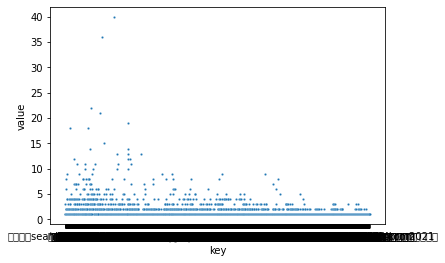

In [222]:
DF2=pd.DataFrame({'key' : collections.Counter(test).keys(),
                  'value' : collections.Counter(test).values()})

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
sns.scatterplot(DF2['key'], DF2['value'], s = 5)
plt.show()

In [228]:
stopwords = ['중인' ,'만큼', '마찬가지', '꼬집었', "연합뉴스", "데일리", "동아일보", "중앙일보", "조선일보", "기자","후", "보다", '수', '금지기사제공' , '있다.'
    ,"아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가",'','기자','통해','및','있는','등','이','대해','선수','한','시즌','당시','무단전재'
    ,'다시','김','최근','것을']
a = collections.Counter(test)
for item in stopwords:
  del a[item]
d=a.items()
sorted(d, key=lambda x: x[1], reverse = True)

[('기성용', 18),
 ('지난', 15),
 ('재배포', 14),
 ('추신수의', 12),
 ('추신수가', 12),
 ('신세계', 12),
 ('나겔스만', 11),
 ('26일', 11),
 ('추신수는', 11),
 ('리그', 10),
 ('토트넘', 9),
 ('선발', 9),
 ('KBO리그', 9),
 ('출신', 8),
 ('선수의', 8),
 ('그', 8),
 ('변호사는', 8),
 ('뒤', 8),
 ('가장', 8),
 ('특히', 8),
 ('모든', 8),
 ('이에', 8),
 ('주장하는', 8),
 ('통산', 8),
 ('박상하의', 8),
 ('감독이', 8),
 ('최초', 7),
 ('독일', 7),
 ('역시', 7),
 ('성폭행', 7),
 ('전혀', 7),
 ('위해', 7),
 ('씨와', 7),
 ('D', 7),
 ('선수는', 7),
 ('25일', 7),
 ('것', 7),
 ('경기를', 7),
 ('인터풋볼', 7),
 ('성폭력', 6),
 ('손흥민은', 6),
 ('국가대표', 6),
 ('증거를', 6),
 ('박지훈', 6),
 ('C', 6),
 ('한번', 6),
 ('이후', 6),
 ('직접', 6),
 ('입장을', 6),
 ('함께', 6),
 ('같은', 6),
 ('스포탈코리아', 6),
 ('그는', 6),
 ('C와', 6),
 ('성폭행을', 6),
 ('스타뉴스', 6),
 ('메이저리그', 6),
 ('3월', 6),
 ('무리뉴', 6),
 ('법적', 5),
 ('되는', 5),
 ('선수가', 5),
 ('않을', 5),
 ('보도자료를', 5),
 ('사실을', 5),
 ('악의적인', 5),
 ('박', 5),
 ('자신의', 5),
 ('매우', 5),
 ('유로파리그', 5),
 ('전', 5),
 ('하고', 5),
 ('다른', 5),
 ('그의', 5),
 ('경우', 5),
 ('로저드뷔', 5),
 ('라이브', 5),
 ('필요한', 

# **코모란으로 핵심어 뽑아내서 실검처럼**

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 7.9MB/s 
     |████████████████████████████████| 460kB 47.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Komoran
print(cont[0])
komoran = Komoran() #'./user_dic.txt'

def komoran_tokenize(sent):
      sent=sent.replace('\n','')
      print(sent)
      words = komoran.pos(sent, flatten=False)#,join=True)
      words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
      return words
print(komoran_tokenize(cont[0]))

In [ ]:
from textrank import KeywordSummarizer

keyword_extractor = KeywordSummarizer(
    tokenize = komoran_tokenize,
    window = -1,
    verbose = False
)

keywords = keyword_extractor.summarize(sents, topk=30)

In [ ]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 5.8MB/s 
     |████████████████████████████████| 7.4MB 45.1MB/s 
     |████████████████████████████████| 92kB 13.4MB/s 
     |████████████████████████████████| 81kB 13.2MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=94bd896d94ee65680dfcf739b7d6dbd7fa6931fda59d4dfa7fc319be060a247c
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=c55be85cb59a0f052e0741e0dbfc2855cb66b96dd5b666497a405bf7fd197ecb
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13538 sha256=88f7a21db728198cbec8ddfbb313f6b150b65e933ccc3f2d614469f54d2dcc4b
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 259kB/s 
     |████████████████████████████████| 460kB 71.3MB/s 
     |████████████████████████████████| 92kB 13.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from newspaper import Article
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import numpy as np

class SentenceTokenizer(object):
  def __init__(self):
    self.kkma = Kkma()
    self.twitter = Twitter()
    self.stopwords = ['중인' ,'만큼', '마찬가지', '꼬집었', "연합뉴스", "데일리", "동아일보", "중앙일보", "조선일보", "기자"
    ,"아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가",]
  def url2sentences(self, url):
    article = Article(url, language='ko')
    article.download()
    article.parse()
    sentences = self.kkma.sentences(article.text)
    for idx in range(0, len(sentences)):
      if len(sentences[idx]) <= 10:
        sentences[idx-1] += (' ' + sentences[idx])
        sentences[idx] = ''
    return sentences

  def text2sentences(self, text):
    sentences = self.kkma.sentences(text)
    for idx in range(0, len(sentences)):
      if len(sentences[idx]) <= 10:
        sentences[idx-1] += (' ' + sentences[idx])
        sentences[idx] = ''
    return sentences

  def get_nouns(self, sentences):
    nouns = []
    for sentence in sentences:
      if sentence is not '':
        nouns.append(' '.join([noun for noun in self.twitter.nouns(str(sentence))
                              if noun not in self.stopwords and len(noun) > 1]))
    return nouns

class GraphMatrix(object):
  def __init__(self):
    self.tfidf = TfidfVectorizer()
    self.cnt_vec = CountVectorizer()
    self.graph_sentence = []
  def build_sent_graph(self, sentence):
    tfidf_mat = self.tfidf.fit_transform(sentence).toarray()
    self.graph_sentence = np.dot(tfidf_mat, tfidf_mat.T)
    return self.graph_sentence
  def build_words_graph(self, sentence):
    cnt_vec_mat = normalize(self.cnt_vec.fit_transform(sentence).toarray().astype(float), axis=0)
    vocab = self.cnt_vec.vocabulary_
    return np.dot(cnt_vec_mat.T, cnt_vec_mat), {vocab[word] : word for word in vocab}

class Rank(object):
  def get_ranks(self, graph, d=0.85): # d = damping factor
    A = graph
    matrix_size = A.shape[0]
    for id in range(matrix_size):
      A[id, id] = 0 # diagonal 부분을 0으로
      link_sum = np.sum(A[:,id]) # A[:, id] = A[:][id]
      if link_sum != 0:
        A[:, id] /= link_sum
      A[:, id] *= -d
      A[id, id] = 1
    B = (1-d) * np.ones((matrix_size, 1))
    ranks = np.linalg.solve(A, B) # 연립방정식 Ax = b
    return {idx: r[0] for idx, r in enumerate(ranks)}

class TextRank(object):
  def __init__(self, text):
    self.sent_tokenize = SentenceTokenizer()
    if text[:5] in ('http:', 'https'):
      self.sentences = self.sent_tokenize.url2sentences(text)
    else:
      self.sentences = self.sent_tokenize.text2sentences(text)
    self.nouns = self.sent_tokenize.get_nouns(self.sentences)
    self.graph_matrix = GraphMatrix()
    self.sent_graph = self.graph_matrix.build_sent_graph(self.nouns)
    self.words_graph, self.idx2word = self.graph_matrix.build_words_graph(self.nouns)
    self.rank = Rank()
    self.sent_rank_idx = self.rank.get_ranks(self.sent_graph)
    self.sorted_sent_rank_idx = sorted(self.sent_rank_idx, key=lambda k: self.sent_rank_idx[k], reverse=True)
    self.word_rank_idx = self.rank.get_ranks(self.words_graph)
    self.sorted_word_rank_idx = sorted(self.word_rank_idx, key=lambda k: self.word_rank_idx[k], reverse=True)

  def summarize(self, sent_num=3):
    summary = []
    index=[]
    for idx in self.sorted_sent_rank_idx[:sent_num]:
      index.append(idx)
    index.sort()
    for idx in index:
      summary.append(self.sentences[idx])
    return summary

  def keywords(self, word_num=10):
    rank = Rank()
    rank_idx = rank.get_ranks(self.words_graph)
    sorted_rank_idx = sorted(rank_idx, key=lambda k: rank_idx[k], reverse=True)
    keywords = []
    index=[]
    for idx in sorted_rank_idx[:word_num]:
      index.append(idx)
    #index.sort()
    for idx in index:
      keywords.append(self.idx2word[idx])
    return keywords

url = 'http://v.media.daum.net/v/20170611192209012?rcmd=r'
textrank = TextRank(url)
for row in textrank.summarize(3):
  print(row)
  print()
print('keywords :',textrank.keywords())

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
